En este nootbook trabajé con los datos de "crude oil" de la base de datos de la International Energy Statistics [database] (United Nations Statistics Division, 2018). Se puede obtener aqui: http://data.un.org/Explorer.aspx

Los datos a obtener eran el valor anual de la suma de las exportaciones menos las importaciones de petróleo:: crudo de los exportadores netos.
Asumismos que la base de datos se refiere a ellos como "Conventional Crude Oil"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

#Leer la direccion, luego el archivo csv, luego transformalo en un DataFrame 
imports = "/Users/Deneb/git/Independent_Projects/PetroleoArellanes/Databases/UNSD/UNdata_Export_20200724_213546535.csv"
exports = "/Users/Deneb/git/Independent_Projects/PetroleoArellanes/Databases/UNSD/UNdata_Export_20200724_213715549.csv"

imports = pd.read_csv(imports)
exports = pd.read_csv(exports)

imports = pd.DataFrame(imports)
exports = pd.DataFrame(exports)

In [2]:
# #Obtener lista de exportadores del archivo proporcionadp
# exp_netos = pd.read_excel("../Exportadores netos 1990-2015.xlsx",  sheet_name="Lista 2", header=None)
# exp_netos = exp_netos[1].to_list()
# #Elimina los primeros tres, porque son NaN
# del exp_netos[0:3]

##Para conincidir con la base de datos traduje con google traslate los nombres de los paises
#exp_netos = ['Albania','Angola','Saudi Arabia','Algeria','Argentina','Benin','Azerbaijan','Bolivia','Brazil','Brunei','Cameroon','Canada','China','Colombia','Congo','Denmark','Ecuador','Egypt','UAE','Estonia','Gabon','Indonesia','Georgia','Ghana','Guatemala','Iran','Iraq','Kazakhstan','Kyrgyzstan','Kuwait','Libya','Malaysia','Mexico','Mongolia','Myanmar','Nigeria','Norway','Oman','Qatar','UK','RD of the Congo','Russia','Trinidad and Tobago','Sudan','South Sudan','Tunisia','Turkmenistan','Vietnam','Venezuela','Yemen']


##### Estos paises tenian nombres diferentes a los de la lista original
        # Bolivia = Bolivia (Plur. State of)
        # Brunei = Brunei Darussalam
        # UAE = United Arab Emirates
    # Estonia = no aparece en la base de datos ni como exportador ni como importador
        # Iran =  Iran (Islamic Rep. of)
        # UK = United Kingdom
        # RD of the Congo = Dem. Rep. of the Congo
        # Russia = Russian Federation 
        # Vietnam = Viet Nam
        # Venezuela = Venezuela (Bolivar. Rep.)


####Use este codigo para identificar cualese estaban y cuales no
# exporters_list = imports["Country or Area"].to_list()
# for x in netos:
#     if x not in exporters_list:
#         print(x)


##### Lista de productores netos adecuada a como aparecen los nombres en la base de datos
netos = ['Albania','Angola','Saudi Arabia','Algeria','Argentina','Benin','Azerbaijan','Bolivia (Plur. State of)','Brazil','Brunei Darussalam','Cameroon','Canada','China','Colombia','Congo','Denmark','Ecuador','Egypt','United Arab Emirates','Estonia','Gabon','Indonesia','Georgia','Ghana','Guatemala','Iran (Islamic Rep. of)','Iraq','Kazakhstan','Kyrgyzstan','Kuwait','Libya','Malaysia','Mexico','Mongolia','Myanmar','Nigeria','Norway','Oman','Qatar','United Kingdom','Dem. Rep. of the Congo','Russian Federation','Trinidad and Tobago','Sudan','South Sudan','Tunisia','Turkmenistan','Viet Nam','Venezuela (Bolivar. Rep.)','Yemen']

### Estos 18 paises no aparecen en la base de datos de importadores 
#['Angola', 'Saudi Arabia', 'Benin', 'Bolivia (Plur. State of)', 'Brunei Darussalam', 'Congo', 'United Arab Emirates', 'Estonia', 'Gabon', 'Iran (Islamic Rep. of)', 'Iraq', 'Kuwait', 'Libya', 'Mongolia', 'Nigeria', 'Oman', 'Qatar', 'South Sudan']

###Estos paises no aparecen en la base de datos de exportadores 
# ['Estonia']

En la lista de importadores hay: 32 paises con 658 registros 

En la lista de exportadores hay: 49 paises con 1240 registros

In [3]:
#Filtra en la base de datos (BD) solo los países que esten en la lista de productores netos
importers = imports.loc[imports["Country or Area"].isin(netos)]
exporters = exports.loc[exports["Country or Area"].isin(netos)]

#En ambas BD castea el valor de año, 
importers = importers.astype({"Year" : "int32"})
exporters = exporters.astype({"Year" : "int32"})

#En ambas BD elimina las columnas de unidad y transacción
importers = importers.drop(columns=["Commodity - Transaction", "Unit"])
exporters = exporters.drop(columns=["Commodity - Transaction", "Unit"])

#En ambas BD agrega la unidad al nombre de la columna, y cambia el nombre de las notas y pais
importers = importers.rename(columns={"Quantity Footnotes" : "imp_notes", "Quantity" : "Imports (Metric tons, thousand)", "Country or Area" : "Country"})
exporters = exporters.rename(columns={"Quantity Footnotes" : "exp_notes", "Quantity" : "Exports (Metric tons, thousand)", "Country or Area" : "Country"})

In [4]:
#Combina las dos BD en una sola
exp_imp = exporters.merge(importers, how="left", on=["Country", "Year"])  
#Transforma los valores Nan en la columna de importaciones en valores de 0
exp_imp["Imports (Metric tons, thousand)"] = exp_imp["Imports (Metric tons, thousand)"].fillna(0)
#Verifica que no se haya perdido ningun dato, comparando la extension de exportadores vs nueva BD
len(exporters) - len(exp_imp)

0

In [5]:
#Create a new column which substract imports to exports to get net exports
exp_imp["Net exports"] =  (exp_imp["Exports (Metric tons, thousand)"] - exp_imp["Imports (Metric tons, thousand)"])


In [36]:
netas = exp_imp
netas.head()

,Country,Year,"Exports (Metric tons, thousand)",exp_notes,"Imports (Metric tons, thousand)",imp_notes,Net exports
0,Albania,2017,488.00,NaN,0.0,NaN,488.00
1,Albania,2016,888.00,NaN,0.0,NaN,888.00
2,Albania,2015,987.00,NaN,0.0,NaN,987.00
3,Albania,2014,1007.22,NaN,0.0,NaN,1007.22
4,Albania,2013,1167.00,NaN,0.0,NaN,1167.00


# NEXT STEPS
- CREAR UNA TABLA EN QUE EL AÑO ESTE HORIZONTAL Y EL PAÍS EN VERTICAL / PARA ANALISIS VISUAL
- DEJAR LA OTRA TABLA PARA USO DE DATA 
- CREAR UNA GRAFICA

In [37]:
netas = netas.pivot_table("Net exports", ["Country"], "Year")

In [38]:
#totales = netas.fillna(0)
totales = netas.sum()
maped = totales.map('{:.4f}'.format)

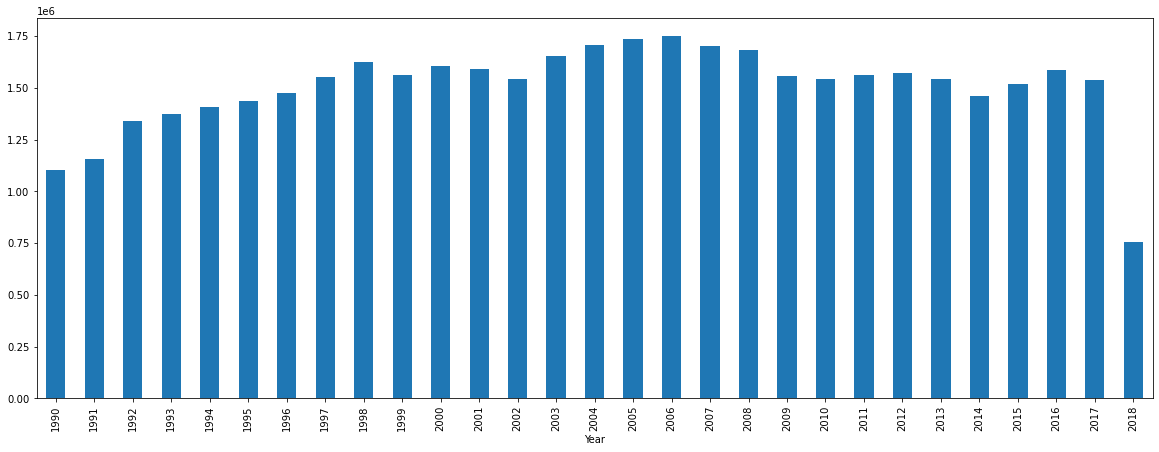

In [49]:

totales.plot(kind='bar', figsize=(20,7))

In [51]:
np.array(totales).dtype

dtype('float64')

In [60]:
mybar = plt.bar(np.array(maped), maped.keys())
mybar.plt.figure(figsize=(20,7))



AttributeError: 'BarContainer' object has no attribute 'plt'

In [61]:
#netas.to_excel("../Excel_reports/Exportaciones_netas.xlsx")
netas.to_csv("../csv_results/exportaciones_anuales_netas.csv")